## Importing the necessary libraries

In [1]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Data.csv")

## EDA

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
print("There are {} rows and {} columns.".format(df.shape[0], df.shape[1]))

There are 5000 rows and 14 columns.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
print("Checking for null values in our the dataset")
df.isna().any()

Checking for null values in our the dataset


ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

### ID and Zipcode might be removed as they may not be useful for our analysis

In [7]:
df.drop(['ID', 'ZIP Code'], axis = 1, inplace = True)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


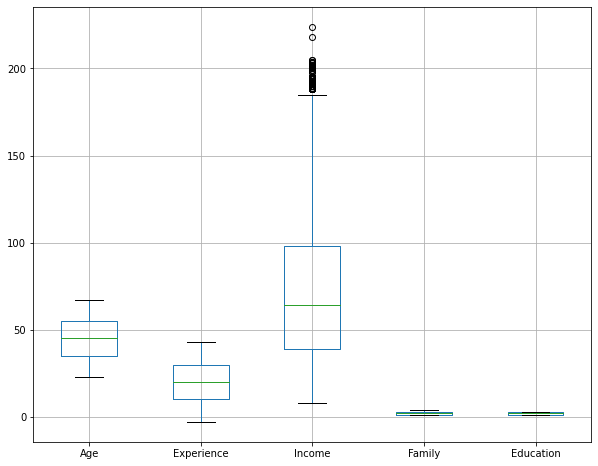

In [9]:
df.boxplot(column=['Age', 'Experience', 'Income', 'Family', 'Education'], return_type='axes', figsize=(10, 8))

### Income has too much noise and slightly skewed right, Age and exp are equally distributed.

In [10]:
df.skew(numeric_only=True)

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598443
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

### we could see that CCAvg,Mortage,Personal Loan, Securities account,CD account are highly skewed

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023BCBFCD188>,
      dtype=object)

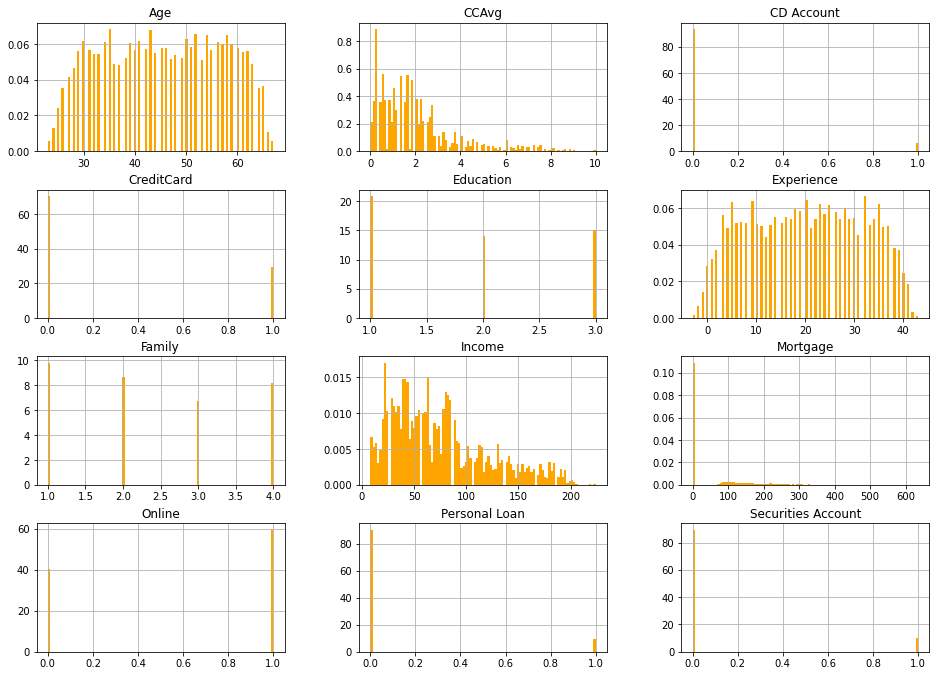

In [11]:
columns = list(df)
df[columns].hist(stacked = True, density = True, bins = 100, color = 'orange', figsize = (16, 30), layout = (10, 3))

*   Age & Experience are to an extent equally distributed
*   60% of customers have enabled online banking and went digital
*   Income & Credit card spending are skewed to the left


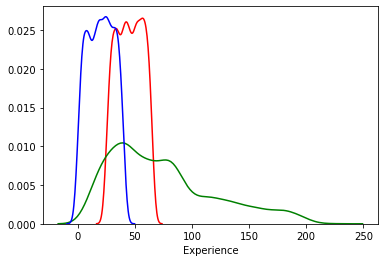

In [12]:
import seaborn as sns

sns.distplot(df['Age'],kde=True,hist=False,color='Red')
sns.distplot(df['Income'],kde=True,hist=False,color='Green')
sns.distplot(df['Experience'],kde=True,hist=False,color='blue')
plt.show()

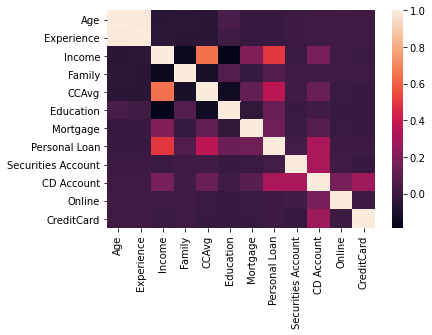

In [13]:
corr = df.corr()
sns.heatmap(corr)

### We could see that Age & Experience are very strongly correlated, Hence it is fine for us to go with Age and drop Experience to avoid multi-colinearity issue.

In [14]:
df=df.drop(['Experience'],axis=1)

In [15]:
def edu(row):    
    if row['Education']==1:
        return "Undergrad"
    elif row['Education']==2:
        return "Graduate"
    else:
        return "Advanced/Professional"
df['EDU']=df.apply(edu,axis=1)

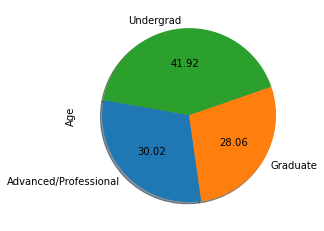

In [16]:
EDU_dis=df.groupby('EDU')["Age"].count()
EDU_dis.plot.pie(shadow=True, startangle=170,autopct='%.2f')

### We could see that We have more Undergraduates 41.92% than graduates(28.06%) & Advanced Professional(30.02%)

In [17]:
def SD_CD(row):
    if (row['Securities Account']==1) & (row['CD Account']==1):
        return"Holds Securities & deposit"
    elif(row['Securities Account']==0) & (row['CD Account']==0):
        return"Does not hold any securities or deposit"
    elif(row['Securities Account']==1) & (row['CD Account']==0):
        return "Holds only Securities Account"
    elif(row['Securities Account']==0) & (row['CD Account']==1):
        return"Holds only deposit"  

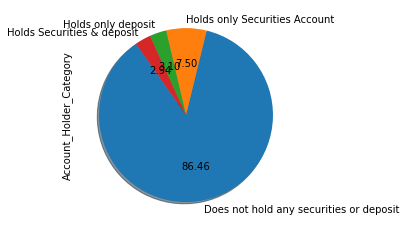

In [18]:
df['Account_Holder_Category']=df.apply(SD_CD,axis=1)
df['Account_Holder_Category'].value_counts().plot.pie(shadow=True, startangle=125,autopct='%.2f')

#### We could see that alomst 87% of customers do not hold any securities or deposit, and 3 % hold both securities as well as deposit. It will be good if we encourage those 87% to open any of these account as it will improve the assests of the bank

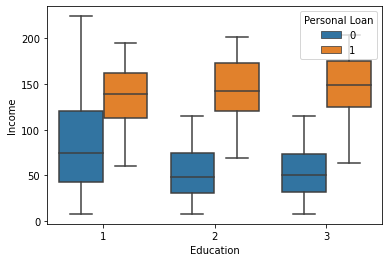

In [19]:
sns.boxplot(df['Education'],df['Income'],hue=df['Personal Loan'])

Text(0.5, 1.0, 'Income Distribution')

C:\Users\Divyanshu\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


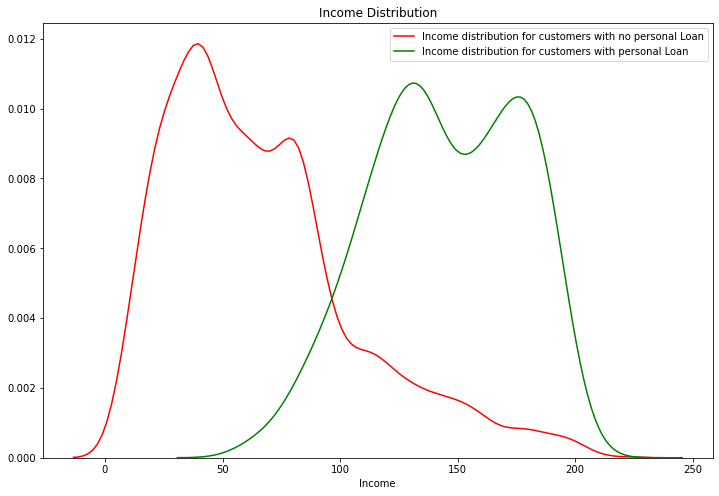

In [20]:
plt.figure(figsize=(12,8))
sns.distplot(df[df['Personal Loan']==0]['Income'],kde=True,color='r',hist=False,label="Income distribution for customers with no personal Loan")
sns.distplot(df[df['Personal Loan']==1]['Income'],kde=True,color='G',hist=False,label="Income distribution for customers with personal Loan")
plt.legend()
plt.title("Income Distribution")

#### Customers who have availed personal loan seem to have higher income than those who do not have personal loan

Text(0.5, 1.0, 'CCAvg Distribution')

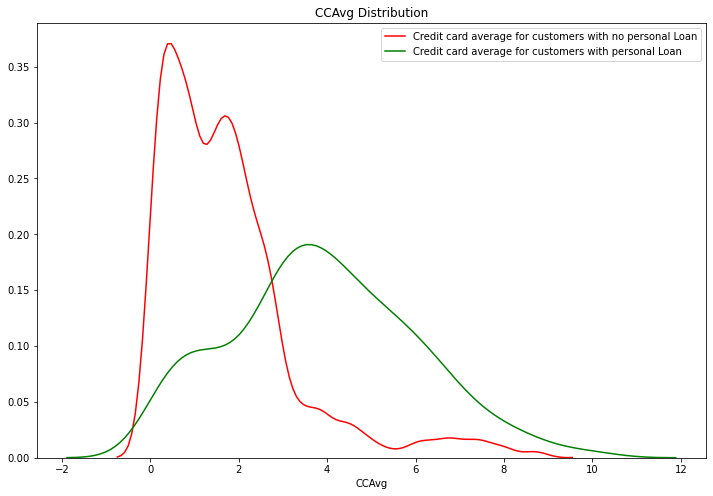

In [21]:
plt.figure(figsize=(12,8))
sns.distplot(df[df['Personal Loan']==0]['CCAvg'],kde=True,hist=False,color='r',label="Credit card average for customers with no personal Loan")
sns.distplot(df[df['Personal Loan']==1]['CCAvg'],kde=True,hist=False,color='G',label="Credit card average for customers with personal Loan")
plt.legend()
plt.title("CCAvg Distribution")

Text(0.5, 1.0, 'Mortgage Distribution')

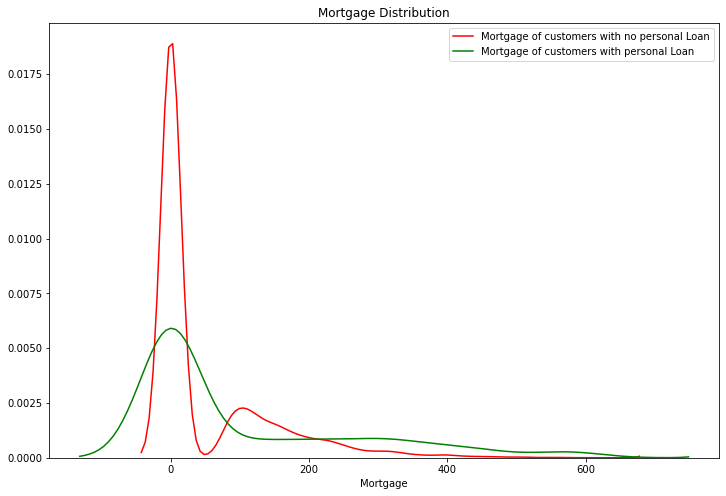

In [22]:
plt.figure(figsize=(12,8))
sns.distplot(df[df['Personal Loan']==0]['Mortgage'],kde=True,hist=False,color='r',label="Mortgage of customers with no personal Loan")
sns.distplot(df[df['Personal Loan']==1]['Mortgage'],kde=True,hist=False,color='G',label="Mortgage of customers with personal Loan")
plt.legend()
plt.title("Mortgage Distribution")

#### People with high mortgage value, i.e more than 400K have availed personal Loan

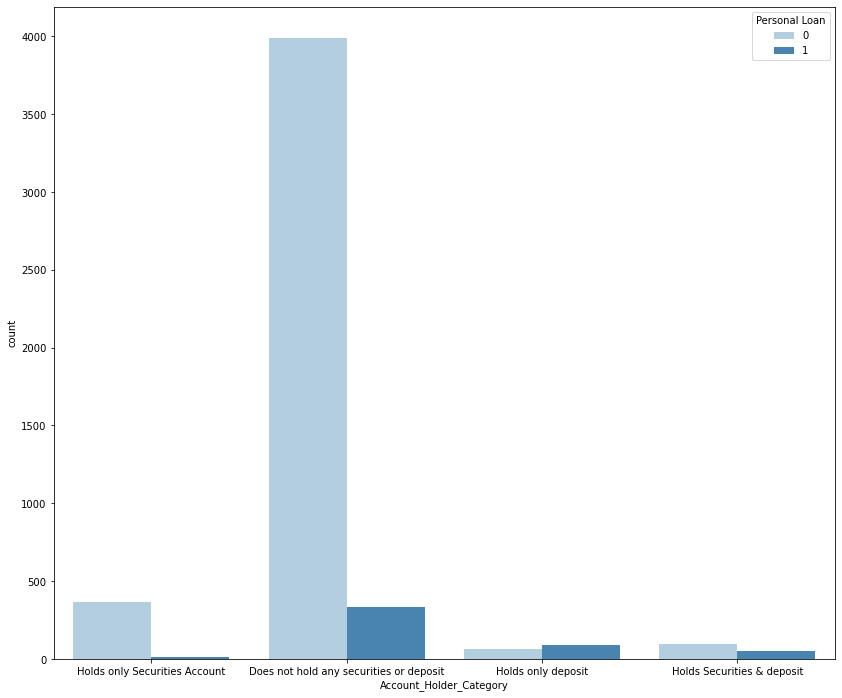

In [23]:
plt.figure(figsize=(14,12))
sns.countplot(df['Account_Holder_Category'],hue=df['Personal Loan'],palette='Blues')
plt.show();

#### From the above graph we could infer that , customers who hold deposit account & customers who do not hold either a securities account or deposit account have aviled personal loan

In [24]:
Data=df.drop(['EDU','Account_Holder_Category'],axis=1)

In [25]:
Data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


Age does not have any impact on availing personal Loan As the P_value is Greater than 0.05 with a value of :0.584959263705325


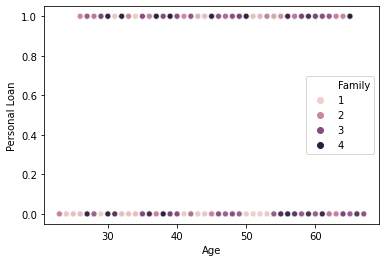

In [26]:
import scipy.stats as stats
sns.scatterplot(Data['Age'],Data['Personal Loan'],hue=Data['Family'],alpha=0.8)

H0="Age does not have any impact on availing personal Loan"
Ha="Age does have phenomenal significance on availing personal Loan"

Age_PL_Yes=np.array(Data[Data['Personal Loan']==1].Age)
Age_PL_No=np.array(Data[Data['Personal Loan']==0].Age)

t,p_value=stats.ttest_ind(Age_PL_Yes,Age_PL_No,axis=0)

if p_value < 0.05:
    print(Ha,"As the P_value is less than 0.05 with a value of :{}".format(p_value))
else:
    print (H0,"As the P_value is Greater than 0.05 with a value of :{}".format(p_value))

Income of a person has significant impact on availing Personal Loan As the P_value is less than 0.05 with a value of :0.0
As you can see from the plot, those who availed Personal Loan tend to have higher income


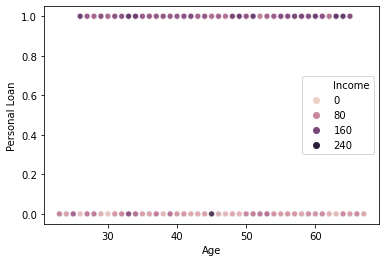

In [27]:
sns.scatterplot(Data['Age'],Data['Personal Loan'],hue=Data['Income'],alpha=0.8)
Income_PL_Yes=np.array((Data[Data['Personal Loan']==1]).Income)
Income_PL_No=np.array((Data[Data['Personal Loan']==0]).Income)

H0="Income of a person does not have an impact on availing Personal Loan"
Ha="Income of a person has significant impact on availing Personal Loan"

t,p_value=stats.ttest_ind(Income_PL_Yes,Income_PL_No,axis=0)

if p_value < 0.05:
    print(Ha,"As the P_value is less than 0.05 with a value of :{}".format(p_value))
    print("As you can see from the plot, those who availed Personal Loan tend to have higher income")
else:
    print (H0,"As the P_value is Greater than 0.05 with a value of :{}".format(p_value))

Number of persons in the family has significant impact on availing Personal Loan As the P_value is less than 0.05 with a value of :1.4099040685673807e-05


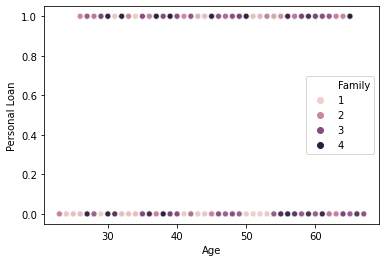

In [28]:
sns.scatterplot(Data['Age'],Data['Personal Loan'],hue=Data['Family'],alpha=0.8)
Family_PL_Yes=np.array((Data[Data['Personal Loan']==1]).Family)
Family_PL_No=np.array((Data[Data['Personal Loan']==0]).Family)

H0="Number of persons in the family does not have an impact on availing Personal Loan"
Ha="Number of persons in the family has significant impact on availing Personal Loan"

t,p_value=stats.ttest_ind(Family_PL_Yes,Family_PL_No,axis=0)

if p_value < 0.05:
    print(Ha,"As the P_value is less than 0.05 with a value of :{}".format(p_value))
else:
    print (H0,"As the P_value is Greater than 0.05 with a value of :{}".format(p_value))

In [29]:
print(Data['Personal Loan'].value_counts())
No_of_customers_availed_PL=Data[Data['Personal Loan']==1].shape[0]
No_of_customers_availed_PL
Total_Cust=Data.shape[0]
percet=(No_of_customers_availed_PL * 100)/Total_Cust 
print("Overall percentage of customers who have availed personal Loan:{}".format(percet),"%")

0    4520
1     480
Name: Personal Loan, dtype: int64
Overall percentage of customers who have availed personal Loan:9.6 %


#### As you could see, our **Target Variable** is not equally distributed, only 9.6% of customers have availed Personal Loan. So, if our model is going to learn from this dataset and do the prediction chances are there that it might be biased towards the Majority class (In this case , Personal loan not being availed by the customer) and ignore the minority class. Hence , we should try to balance our dataset to make our model learn and predict with being biased and treat both classes equally for better result.

## Modelling

### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

In [31]:
X=Data.drop(['Personal Loan'],axis=1)
y=Data['Personal Loan']

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=23)

In [33]:
Model1_raw=LogisticRegression(solver='liblinear')
Model1_raw.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [34]:
Model1_raw_coef=pd.DataFrame(Model1_raw.coef_)
Model1_raw_coef

,0,1,2,3,4,5,6,7,8,9
0,-0.010601,0.041228,0.40878,0.100676,1.197649,0.000437,-0.914748,3.320179,-0.645089,-0.947116


In [35]:
Model1_raw.score(X_train,y_train)

0.9508571428571428

In [36]:
Model1_raw.score(X_test,y_test)

0.9433333333333334

In [37]:
Model1_raw_prediction=Model1_raw.predict(X_test)

### Accuracy,F1, Precision & recall with imbalanced data for Logistic Regression

In [38]:
cm_model1=confusion_matrix(y_test,Model1_raw_prediction,labels=[0,1])
print(cm_model1)
acc_score_log1=accuracy_score(y_test,Model1_raw_prediction)
f1_score_log1=f1_score(y_test,Model1_raw_prediction)
print("Accuracy Score  for Logistic Regression RAW DATA:{}".format(acc_score_log1*100))
print("F1 Score  for Logistic Regression RAW DATA:{}".format(f1_score_log1*100))
print(classification_report(y_test,Model1_raw_prediction))

[[1326   17]
 [  68   89]]
Accuracy Score  for Logistic Regression RAW DATA:94.33333333333334
F1 Score  for Logistic Regression RAW DATA:67.68060836501901
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1343
           1       0.84      0.57      0.68       157

    accuracy                           0.94      1500
   macro avg       0.90      0.78      0.82      1500
weighted avg       0.94      0.94      0.94      1500



#### Though we have a very good accuracy score of 94%, We should not consider this score as our data is highly imbalanced.

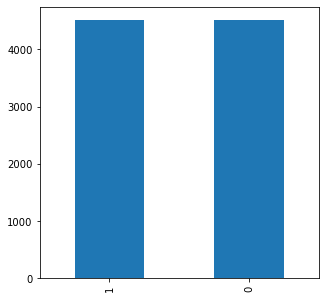

In [39]:
from  sklearn.utils import resample
df_majority=Data[Data['Personal Loan']==0]
df_minority=Data[Data['Personal Loan']==1]
df_upsample_minority=resample(df_minority,replace=True,random_state=12,n_samples=4520)
df_upsample=pd.concat([df_majority,df_upsample_minority])
count=df_upsample['Personal Loan'].value_counts()
count.plot(kind='bar',figsize=(5,5));

#### Now class imbalance has been rectified , as you can see from above both the classes for our Dependent variable "Personal Loan" are same, we have done minority upsampling to have equal distribution of both the classes.

### Upsampling the data

In [40]:
X_upsampled=df_upsample.drop(['Personal Loan'],axis=1)
Y_upsampled=df_upsample['Personal Loan']

In [41]:
X_upsampled_test,X_upsampled_train,Y_upsampled_test,Y_upsampled_train=train_test_split(X_upsampled,Y_upsampled,random_state=1,test_size=0.3)

### Logistic Regression with upsampled data

In [42]:
Model1_raw.fit(X_upsampled_train,Y_upsampled_train)

LogisticRegression(solver='liblinear')

In [43]:
Pred_Upsample_Log=Model1_raw.predict(X_upsampled_test)
cm_model1_upsample=confusion_matrix(Y_upsampled_test,Pred_Upsample_Log,labels=[0,1])

In [44]:
print(classification_report(Y_upsampled_test,Pred_Upsample_Log))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      3158
           1       0.89      0.93      0.91      3170

    accuracy                           0.91      6328
   macro avg       0.91      0.91      0.91      6328
weighted avg       0.91      0.91      0.91      6328



#### As , you can see the upsampled data produced a accouracy score of 91%, with 93% recall and 89% Precision. Whereas, Raw data had 54% recall and 84% Precision.

### **Naive Bayes** with both Raw & Upsampled Data

In [45]:
from sklearn.naive_bayes import GaussianNB
Model2_nb=GaussianNB()

In [46]:
Model2_nb.fit(X_upsampled_train,Y_upsampled_train)
Model2_nb.fit(X_train,y_train)

GaussianNB()

In [47]:
Model2_nb.fit(X_upsampled_test,Y_upsampled_test)
Model2_nb.fit(X_test,y_test)

GaussianNB()

In [48]:
print("####################Raw Data Score####################")
print(Model2_nb.score(X_train,y_train))
print(Model2_nb.score(X_test,y_test))
print("####################Sample Data Score####################")
print(Model2_nb.score(X_upsampled_train,Y_upsampled_train))
print(Model2_nb.score(X_upsampled_test,Y_upsampled_test))

####################Raw Data Score####################
0.8831428571428571
0.8786666666666667
####################Sample Data Score####################
0.7577433628318584
0.7436788874841972


In [49]:
Pred_nb_raw=Model2_nb.predict(X_test)
Pred_nb_Upsampled=Model2_nb.predict(X_upsampled_test)
CM_NB_RAW=confusion_matrix(y_test,Pred_nb_raw)
CM_NB_UPSAMPLE=confusion_matrix(Y_upsampled_test,Pred_nb_Upsampled)

In [50]:
acc_score_NB_Raw=accuracy_score(y_test,Pred_nb_raw)
f1_score_NB_raw=f1_score(y_test,Pred_nb_raw)
print("Accuracy Score  for Naive Bayes Model RAW DATA:{}".format(acc_score_NB_Raw*100))
print("F1 Score  for Naive Bayes Model RAW DATA:{}".format(f1_score_NB_raw*100))
print("+++++++++++++++THE CONFUSION MATRIX RAW DATA++++++++++++++++")
print("Confusion Matrix: \n",CM_NB_RAW)
print("+++++++++++++++CLASSIFICATION REPORT RAW DATA++++++++++++++++")
print(classification_report(y_test,Pred_nb_raw))
acc_score_NB_upsampled=accuracy_score(Y_upsampled_test,Pred_nb_Upsampled)
f1_score_NB_upsampled=f1_score(Y_upsampled_test,Pred_nb_Upsampled)
print("Accuracy Score  for Naive Bayes Model Upsampled Data:{}".format(acc_score_NB_upsampled*100))
print("F1 Score  for Naive Bayes Model:{}".format(f1_score_NB_upsampled*100))
print("+++++++++++++++THE CONFUSION MATRIX Upsampled Data++++++++++++++++")
print("Confusion Matrix: \n",CM_NB_UPSAMPLE)
print("+++++++++++++++CLASSIFICATION REPORT Upsampled Data++++++++++++++++")
print(classification_report(Y_upsampled_test,Pred_Upsample_Log))

Accuracy Score  for Naive Bayes Model RAW DATA:87.86666666666667
F1 Score  for Naive Bayes Model RAW DATA:49.444444444444436
+++++++++++++++THE CONFUSION MATRIX RAW DATA++++++++++++++++
Confusion Matrix: 
 [[1229  114]
 [  68   89]]
+++++++++++++++CLASSIFICATION REPORT RAW DATA++++++++++++++++
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1343
           1       0.44      0.57      0.49       157

    accuracy                           0.88      1500
   macro avg       0.69      0.74      0.71      1500
weighted avg       0.89      0.88      0.89      1500

Accuracy Score  for Naive Bayes Model Upsampled Data:74.36788874841972
F1 Score  for Naive Bayes Model:69.23368740515933
+++++++++++++++THE CONFUSION MATRIX Upsampled Data++++++++++++++++
Confusion Matrix: 
 [[2881  277]
 [1345 1825]]
+++++++++++++++CLASSIFICATION REPORT Upsampled Data++++++++++++++++
              precision    recall  f1-score   support

           0       0

#### As , you can see the upsampled data produced a accouracy score of 74%, with 93% recall and 89% Precision. Whereas, Raw data had 57% recall and 44% Precision which was low. Though accuracy was high other metrics with raw data on Naive Bayes were not effective

### **KNN** Algorithm with Raw and Upsampled Data

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
Model3_KNN=KNeighborsClassifier(n_neighbors=11)
Model3_KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [53]:
Predict_knn=Model3_KNN.predict(X_test)
CM_KNN=confusion_matrix(y_test,Predict_knn)

In [54]:
Model3_KNN.fit(X_upsampled_train,Y_upsampled_train)
Predict_KNN_Sampled=Model3_KNN.predict(X_upsampled_test)
CM_KNN_SAMPLED=confusion_matrix(Y_upsampled_test,Predict_KNN_Sampled)

In [55]:
acc_score_KNN_Raw=accuracy_score(y_test,Predict_knn)
f1_score_KNN_raw=f1_score(y_test,Predict_knn)
print("Accuracy Score  for KNN with RAW DATA:{}".format(acc_score_KNN_Raw*100))
print("F1 Score for KNN with RAW DATA:{}".format(f1_score_KNN_raw*100))
print("+++++++++++++++THE CONFUSION MATRIX for KNN RAW DATA++++++++++++++++")
print("Confusion Matrix: \n",CM_KNN)
print("+++++++++++++++CLASSIFICATION REPORT for KNN RAW DATA++++++++++++++++")
print(classification_report(y_test,Predict_knn))
acc_score_KNN_upsampled=accuracy_score(Y_upsampled_test,Predict_KNN_Sampled)
f1_score_KNN_upsampled=f1_score(Y_upsampled_test,Predict_KNN_Sampled)
print("Accuracy Score  for KNN with Upsampled Data:{}".format(acc_score_KNN_upsampled*100))
print("F1 Score  for for KNN with Upsampled Data:{}".format(f1_score_KNN_upsampled*100))
print("+++++++++++++++THE CONFUSION MATRIX KNN Upsampled Data++++++++++++++++")
print("Confusion Matrix: \n",CM_KNN_SAMPLED)
print("+++++++++++++++CLASSIFICATION REPORT KNN Upsampled Data++++++++++++++++")
print(classification_report(Y_upsampled_test,Predict_KNN_Sampled))

Accuracy Score  for KNN with RAW DATA:90.46666666666667
F1 Score for KNN with RAW DATA:36.44444444444444
+++++++++++++++THE CONFUSION MATRIX for KNN RAW DATA++++++++++++++++
Confusion Matrix: 
 [[1316   27]
 [ 116   41]]
+++++++++++++++CLASSIFICATION REPORT for KNN RAW DATA++++++++++++++++
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1343
           1       0.60      0.26      0.36       157

    accuracy                           0.90      1500
   macro avg       0.76      0.62      0.66      1500
weighted avg       0.89      0.90      0.89      1500

Accuracy Score  for KNN with Upsampled Data:87.75284450063211
F1 Score  for for KNN with Upsampled Data:88.52701702442634
+++++++++++++++THE CONFUSION MATRIX KNN Upsampled Data++++++++++++++++
Confusion Matrix: 
 [[2563  595]
 [ 180 2990]]
+++++++++++++++CLASSIFICATION REPORT KNN Upsampled Data++++++++++++++++
              precision    recall  f1-score   support

           0   

#### As , you can see the upsampled data produced a accouracy score of 87%, with 94% recall and 83% Precision. Whereas, Raw data had 26% recall and 60% Precision.

### **Model evaluation**

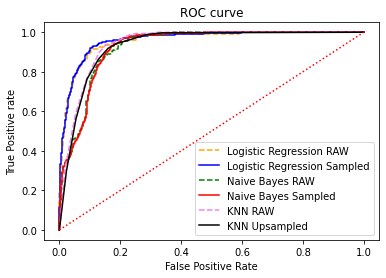

ROC_AUC_Score for Logistic Regression with Raw Data:0.9588050329379514
ROC_AUC_Score for Logistic Regression with Upsample  Data:0.9614615527537095
ROC_AUC_Score for Naive Bayes with Raw Data:0.9272045188308331
ROC_AUC_Score for Naive Bayes with Upsample  Data:0.9273372117879982
ROC_AUC_Score for KNN with Raw Data:0.9410294473348478
ROC_AUC_Score for KNN with Upsample  Data:0.933101401877561
The Best AUC_SCORE that we have got is :0.9614615527537095


In [56]:
from sklearn.metrics import roc_curve,auc,roc_auc_score


PRED_PROB_LOG_RAW=Model1_raw.predict_proba(X_test)
PRED_PROB_LOG_SAMPLED=Model1_raw.predict_proba(X_upsampled_test)

PRED_PROB_NB_RAW=Model2_nb.predict_proba(X_test)
PRED_PROB_NB_SAMPLED=Model2_nb.predict_proba(X_upsampled_test)

PRED_PROB_KNN_RAW=Model3_KNN.predict_proba(X_test)
PRED_PROB_KNN_SAMPLED=Model3_KNN.predict_proba(X_upsampled_test)

#calculate fpr,tpr,threshold
fpr1, tpr1, thresh1 = roc_curve(y_test, PRED_PROB_LOG_RAW[:,1], pos_label=1)
fpr2,tpr2,thresh2= roc_curve(Y_upsampled_test,PRED_PROB_LOG_SAMPLED[:,1],pos_label=1)
fpr3,tpr3,thresh3=roc_curve(y_test,PRED_PROB_NB_RAW[:,1],pos_label=1)
fpr4,tpr4,thresh4=roc_curve(Y_upsampled_test,PRED_PROB_NB_SAMPLED[:,1],pos_label=1)
fpr5,tpr5,thresh5=roc_curve(y_test,PRED_PROB_KNN_RAW[:,1],pos_label=1)
fpr6,tpr6,thresh6=roc_curve(Y_upsampled_test,PRED_PROB_KNN_SAMPLED[:,1],pos_label=1)


random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


AUC_LOG_RAW=roc_auc_score(y_test,PRED_PROB_LOG_RAW[:,1])
AUC_LOG_SAMPLED=roc_auc_score(Y_upsampled_test,PRED_PROB_LOG_SAMPLED[:,1])
AUC_NB_RAW=roc_auc_score(y_test,PRED_PROB_NB_RAW[:,1])
AUC_NB_UPSAMPLED=roc_auc_score(Y_upsampled_test,PRED_PROB_NB_SAMPLED[:,1])
AUC_KNN_RAW=roc_auc_score(y_test,PRED_PROB_KNN_RAW[:,1])
AUC_KNN_UPSAMPLED=roc_auc_score(Y_upsampled_test,PRED_PROB_KNN_SAMPLED[:,1])

AUC_SCORES=pd.array([AUC_LOG_RAW,AUC_LOG_SAMPLED,AUC_NB_RAW,AUC_NB_UPSAMPLED,AUC_KNN_RAW,AUC_KNN_UPSAMPLED])



#Plot Area Under Curve

plt.plot(fpr1,tpr1,linestyle='--',color='orange', label='Logistic Regression RAW')
plt.plot(fpr2,tpr2,linestyle='solid',color='blue', label='Logistic Regression Sampled')
plt.plot(fpr3,tpr3,linestyle='--',color='Green', label='Naive Bayes RAW')
plt.plot(fpr4,tpr4,linestyle='solid',color='Red', label='Naive Bayes Sampled')
plt.plot(fpr5,tpr5,linestyle='--',color='violet',label='KNN RAW')
plt.plot(fpr6,tpr6,linestyle='solid',color='black',label='KNN Upsampled')

plt.plot(p_fpr, p_tpr, linestyle=':', color='red')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

print("ROC_AUC_Score for Logistic Regression with Raw Data:{}".format(AUC_LOG_RAW))
print("ROC_AUC_Score for Logistic Regression with Upsample  Data:{}".format(AUC_LOG_SAMPLED))
print("ROC_AUC_Score for Naive Bayes with Raw Data:{}".format(AUC_NB_RAW))
print("ROC_AUC_Score for Naive Bayes with Upsample  Data:{}".format(AUC_NB_UPSAMPLED))
print("ROC_AUC_Score for KNN with Raw Data:{}".format(AUC_KNN_RAW))
print("ROC_AUC_Score for KNN with Upsample  Data:{}".format(AUC_KNN_UPSAMPLED))  
print("=======================================================================")
print("The Best AUC_SCORE that we have got is :{}".format(AUC_SCORES.max()))

## **Conclusion**

#### Higher the AUC, better the model is at distinguishing between a customer buying personal Loan and Not buying Personal Loan.

### The Blue line shows that our **Logistic model** on sampled data alomst covers more region and 96% can predict our class covering both cutomers who will buy and not buy Personal Loan.